In [19]:
import pandas as pd
import torch
from pathlib import Path

In [29]:
bs=12

In [30]:
path = Path('data/')
!ls {path}

dataset.csv


In [24]:
df = pd.read_csv(path/'dataset.csv')

In [25]:
df.head()

,Unnamed: 0,articleContent,articleDate,articleTitle,newspaperTitle,label
0,0,"ULbs popuLA Lhas SUPSEI. THUESDAY, iARca 9, 18...","March 9th 1893, 00:00:00.000","In the House of Commons, yesterday, the Rating...",Liverpool Mercury,1
1,1,%.~ . It SALUS POPULI L&Z SUFF3 fl D _ HURSDAY...,"June 4th 1891, 00:00:00.000","In the House of Commons; yesterday, the commit...",Liverpool Mercury,1
2,2,"6""A FLYING-MACEfINE OF THE M OLDEN DAYS.- [Fao...","September 22nd 1899, 00:00:00.000","""A FLYING-MACHINE OF THE OLDEN DAYS.""",Liverpool Mercury,1
3,3,IEN GLISH MACHINERY IN FRANCE. The following p...,"June 16th 1892, 00:00:00.000",ENGLISH MACHINERY IN FRANCE.,Liverpool Mercury,1
4,4,THE RATING OF MACHINERY. 5 - - c Y.esebrday af...,"April 6th 1892, 00:00:00.000",THE RATING OF MACHINERY.,Liverpool Mercury,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
Unnamed: 0        60 non-null int64
articleContent    60 non-null object
articleDate       60 non-null object
articleTitle      60 non-null object
newspaperTitle    60 non-null object
label             60 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.9+ KB


# split data

In [27]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df, test_size=0.3)

In [31]:
data_lm = TextLMDataBunch.from_df(path, train_df=df, valid_df=df, text_cols='articleTitle', bs=bs)# Classifier model data

In [33]:
data_lm.show_batch()

idx,text
0,xxup xxunk . xxbos xxup the xxup rating xxup of xxup machinery . xxbos xxup xxunk xxup from xxup at xxup xxunk xxup xxunk xxup machine . xxbos xxup the xxup xxunk xxup xxunk xxup machinery . xxbos xxup the xxup machinery xxup xxunk xxup xxunk . xxbos xxup xxunk xxup machine xxup xxunk . xxbos xxup xxunk xxup xxunk xxunk xxup the xxup rating xxup of xxup machinery
1,xxup xxunk xxup xxunk xxunk xxup the xxup rating xxup of xxup machinery . xxbos xxup xxunk xxup xxunk xxup and xxup xxunk xxup machinery . xxbos xxup the xxup rating xxup of xxup machinery . xxbos xxup xxunk xxup the xxup machine . xxbos xxup machinery xxup on xxup xxunk xxup xxunk xxup xxunk . xxbos xxup xxunk xxup xxunk xxup xxunk xxup machinery . xxbos xxup xxunk
2,"xxup xxunk xxup xxunk xxup xxunk xxup machinery . xxbos xxup xxunk xxup of xxup machinery xxup from xxup rating . xxbos xxup machinery "" xxup xxunk xxup xxunk . "" xxbos xxup rating xxup of xxup machinery . xxbos xxup xxunk xxup and xxup xxunk xxup xxunk . xxbos xxup xxunk xxup of xxup machinery . xxbos xxup xxunk xxup and xxup xxunk ' xxup flower xxup xxunk"
3,. xxbos xxup xxunk xxup and xxup xxunk ' xxup flower xxup xxunk . xxbos xxup hawarden xxup flower xxup show xxbos xxup xxunk xxup on - xxup xxunk . xxbos xxup aughton xxup flower xxup and xxup poultry xxup show . xxbos xxup xxunk . xxup xxunk xxup at xxup hawarden xxup flower xxup show . xxbos xxup xxunk xxup flower xxup show xxup in xxup xxunk xxup
4,xxbos xxup xxunk xxup flower xxup show xxup in xxup xxunk xxup xxunk . xxbos xxup xxunk xxup xxunk ' xxup flower xxup show . xxbos xxup west xxup xxunk xxup flower xxup show . xxbos xxup xxunk xxup and xxup flower xxup show xxup at xxup hawarden . xxbos xxup gateacre xxup flower xxup show . xxbos xxup flower xxup show xxup at xxup gateacre . xxbos xxup


In [36]:
data_clas = TextClasDataBunch.from_df(path, train_df=train_df, valid_df=valid_df, text_cols="articleTitle", label_cols='label', bs=bs)

In [37]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')

In [38]:
data_lm = load_data(path, 'data_lm_export.pkl')
data_clas = load_data(path, 'data_clas_export.pkl', bs=bs)

In [39]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


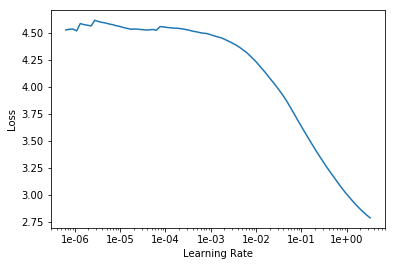

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(1, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,4.492246,3.948673,0.300223,00:00


In [43]:
learn.save_encoder('fine-tuned')

In [44]:
data_clas = TextClasDataBunch.from_df(path, train_df=train_df, valid_df=valid_df, text_cols="articleTitle", label_cols='label', bs=32, vocab=data_lm.train_ds.vocab,)


In [45]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.load_encoder('fine-tuned')

In [46]:
learn.fit_one_cycle(1, 1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,1.190485,1.104668,0.166667,00:00


In [48]:
learn.unfreeze()

In [49]:
learn.fit_one_cycle(3, 1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,1.132427,1.104734,0.166667,00:00
1,1.164683,1.103954,0.166667,00:00
2,1.166487,1.103265,0.166667,00:00
